In [ ]:
"""
This is the coined quantum walk algorithm, used to perform a random
quantum walk in a cyclic graph composed by 8 states. 

In general to represent 2^n states graphs we need n qubits, then 1 quibit
is needed, in this case, for the coin operator (in this example we are using the 
hadamard coin operator that requires just one quibit). 

After identifying each state of the graph with the correspondent 3-bit binary
state we construct the graph disposing this state in lexicographic order. Then 
starting from one state the quantum walk is performed by randomly choosing the
next state to walk in. Since we have 2 possible choiches we can let the coin
operator decide randomly which direction is to be taken.

Then to move in the randomly choosen state we need to perform a shift, since 
we disposed the state in lexicographic order the way in which we can actually
move is by performing an increment or decrement of the current state

for example, starting from state zero: 000, we can move to 001 or 111
"""

In [11]:
from qiskit import *

In [12]:
#increment operator for a 3-bit state register

def increment_op(circuit):
    qr = circuit.qubits
    circuit.mct([qr[0],qr[1],qr[2]],qr[3],None,mode='noancilla')
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.cx(qr[0],qr[1])
    circuit.barrier()
    return circuit

In [13]:
#decrement operator for a 3-bit state register

def decrement_op(circuit):
    qr = circuit.qubits
    circuit.x(qr)   
    circuit.barrier()
    circuit.mct([qr[0],qr[1],qr[2]],qr[3],None,mode='noancilla')
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.cx(qr[0],qr[1])
    circuit.barrier()
    circuit.x(qr)
    return circuit

In [14]:
#construct the circuit for one iteration of the random walk, this will perfom a "coin toss" and a shift 
#in the choosen direction

def random_walk_step(circuit):
    #increment operator circuit
    qr_incr = QuantumRegister(4)
    increment_circ = QuantumCircuit(qr_incr, name='increment')
    increment_op(increment_circ)
    increment_inst = increment_circ.to_instruction()

    #decrement operator circuit
    qr_decr = QuantumRegister(4)
    decrement_circ = QuantumCircuit(qr_decr, name='decrement')
    decrement_op(decrement_circ)
    decrement_inst = decrement_circ.to_instruction()

    circuit.h(qr[0])
    circuit.append(increment_inst, qr[0:4])
    circuit.append(decrement_inst, qr[0:4])
    
    return circuit   

In [15]:
def random_walk(steps, circuit):
    for i in range(0, steps):
        random_walk_step(circuit)
    return circuit

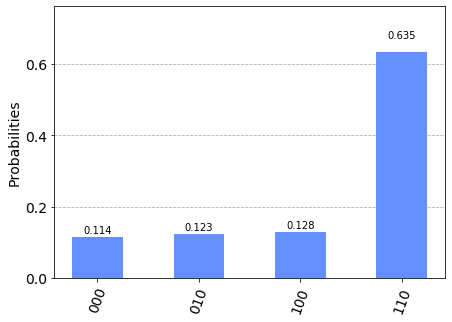

In [16]:
#construct the circuit
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)

# perform a walk of n-steps and measure
steps = 100
random_walk(steps, circuit)
circuit.measure(qr[1:4], cr)

#simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

# show result
from qiskit.tools.visualization import plot_histogram, plot_circuit_layout
plot_histogram(result.get_counts(circuit))

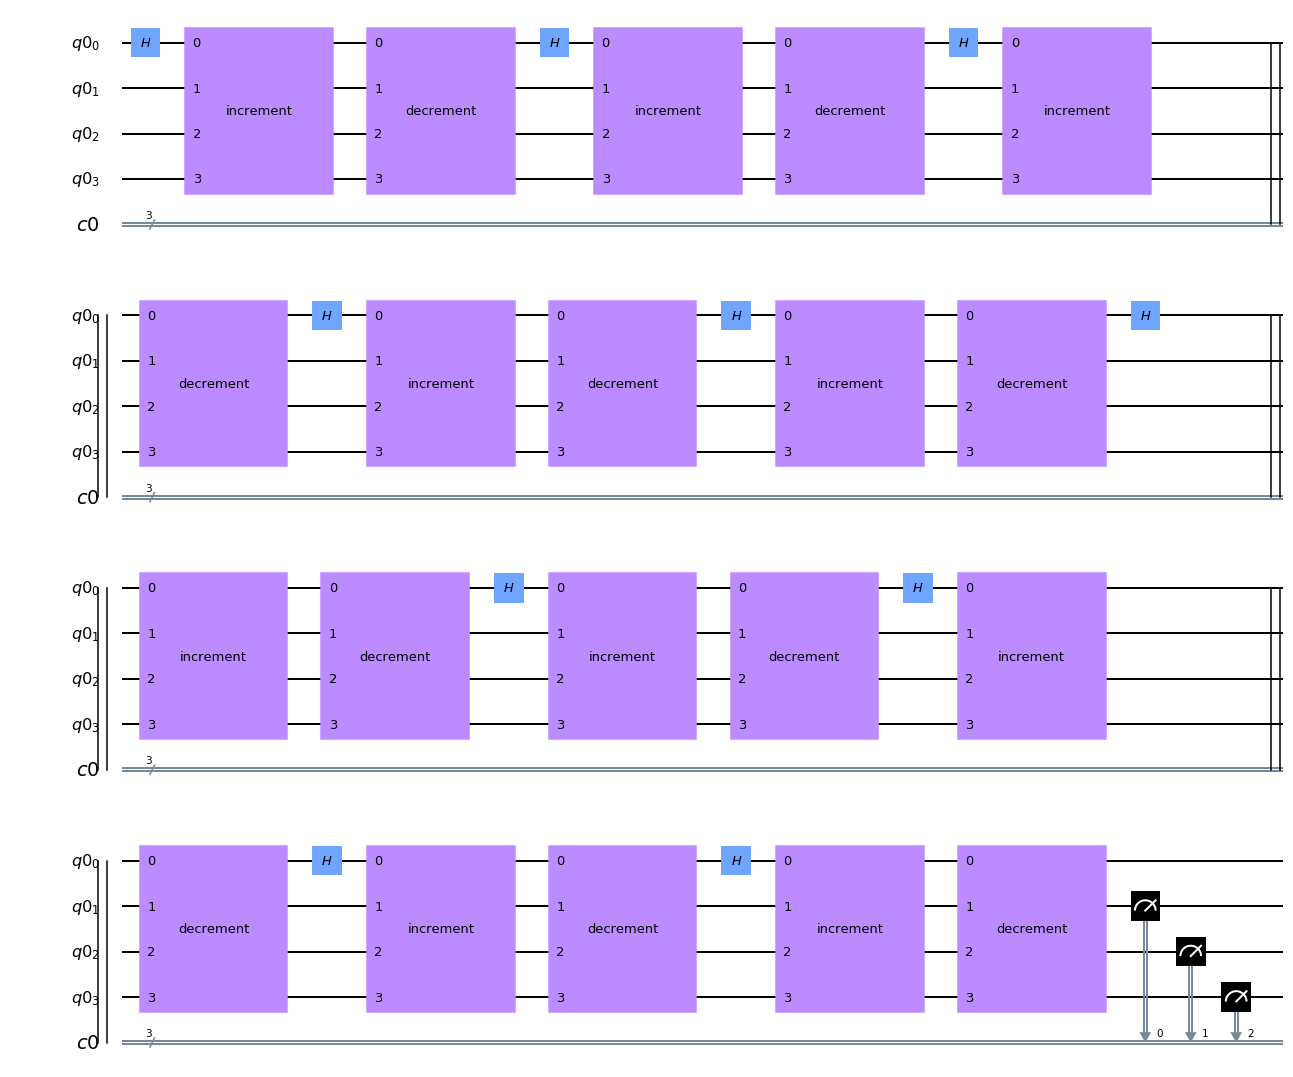

In [7]:
#circuit.draw(output='mpl')

In [8]:
# now a simulation with more step, omitting the circuit drawing
qr = QuantumRegister(4)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)

In [9]:
steps = 1
random_walk(steps, circuit)
circuit.measure(qr[1:4], cr)

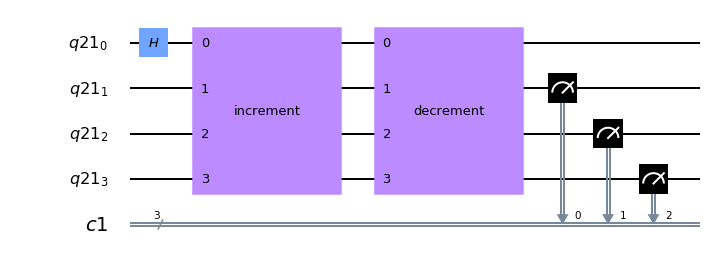

In [10]:
circuit.draw(output='mpl')

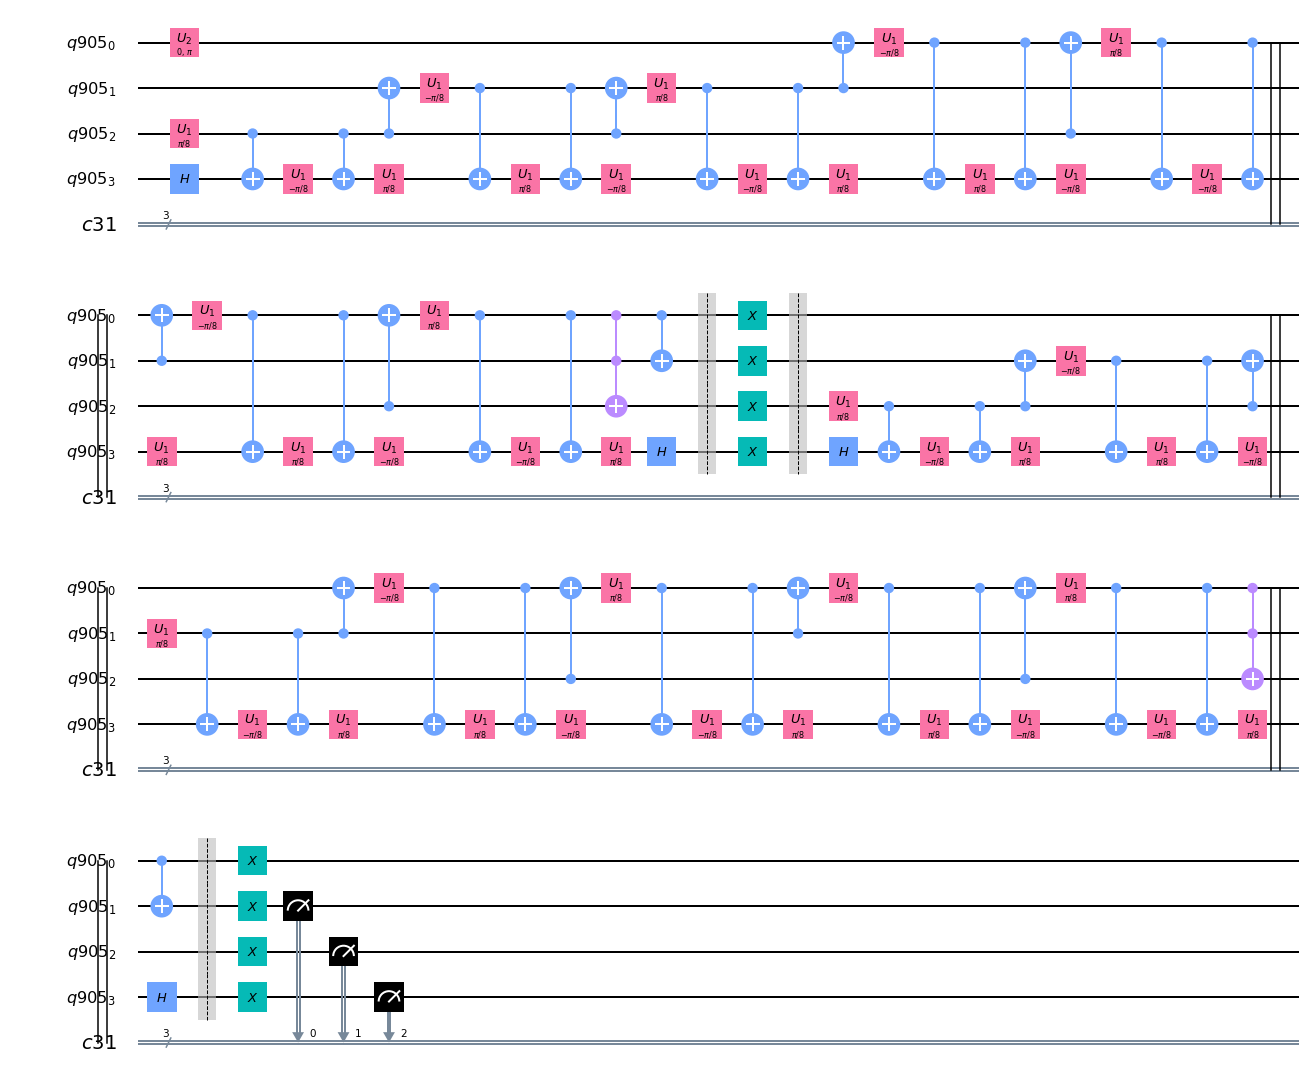

In [126]:
# the decomposed version
decomposed = circuit.decompose()
decomposed.draw(output='mpl')

In [127]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator).result()

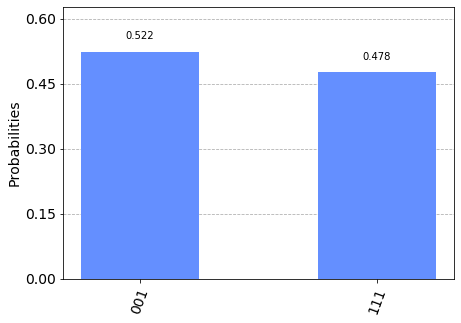

In [128]:
from qiskit.tools.visualization import plot_histogram, plot_circuit_layout
plot_histogram(result.get_counts(circuit))